# 3. Multi-Dimensional Analysis(다차원 분석)에서 통계분석
- Proposed by Biber (1988) and used in various text analytic research
- Useful to identify genre and stylistic features of texts
- Six dimensions of lexico-grammatical patterns of texts


In [28]:
import os
os.getcwd()


'C:\\Users\\sumihan\\Desktop\\NLP 연구\\AI 소설 텍스트 분석 연구'

In [29]:
# 필요한 패키지

# !pip install seaborn
# !pip install factor_analyzer  
# from factor_analyzer import FactorAnalyzer

In [30]:
import pandas as pd
# !pip install statsmodels
# from statsmodels.multivariate.manova import MANOVA

In [31]:
# MDA_dimensions 데이터 읽기

import pandas as pd

df = pd.read_csv('data_analysis_MDA.csv')
df.head()
df = df[:212]
df[113:116]

,Filename,Gender,Publication Year,Dimension1,Dimension2,Dimension3,Dimension4,Dimension5,Dimension6,Closest Text Type,Type
113,C114_Dagon,Male,1917.0,-7.39,1.42,3.96,-3.42,0.38,0.16,General narrative exposition,SF
114,C115_Nyarlathotep_H_P_Lovecraft,Male,1920.0,-5.55,0.42,4.21,-6.51,-2.42,0.48,General narrative exposition,SF
115,C116_The_Whisper_in_the_Darkness,Male,1930.0,-3.99,1.82,2.78,-0.02,-0.20,1.17,General narrative exposition,SF


In [33]:
df['Publication Year'] = df['Publication Year'].astype('int')
df.dtypes
df[113:116]

,Filename,Gender,Publication Year,Dimension1,Dimension2,Dimension3,Dimension4,Dimension5,Dimension6,Closest Text Type,Type
113,C114_Dagon,Male,1917,-7.39,1.42,3.96,-3.42,0.38,0.16,General narrative exposition,SF
114,C115_Nyarlathotep_H_P_Lovecraft,Male,1920,-5.55,0.42,4.21,-6.51,-2.42,0.48,General narrative exposition,SF
115,C116_The_Whisper_in_the_Darkness,Male,1930,-3.99,1.82,2.78,-0.02,-0.20,1.17,General narrative exposition,SF


In [34]:
df['Publication Year'].value_counts().sort_index()   # 20, 21세기 소설이나 예외있음(2권)    

Publication Year
1826        1
1896        1
1901        1
1904        1
1906        2
           ..
2019        6
2020        5
2022        1
19602015    1
19862013    1
Name: count, Length: 84, dtype: int64

In [35]:
df[df['Publication Year']>2000]['Publication Year'].count()       #106개?    # 19602015    19862013    => 이 경우 두개 빼고, 104개

106

In [38]:
df[df['Publication Year']>2000]['Publication Year']

0      2017
1      2020
2      2017
8      2011
9      2003
       ... 
202    2011
203    2014
209    2013
210    2017
211    2018
Name: Publication Year, Length: 106, dtype: int32

In [39]:
df[df['Publication Year'] <= 2000]['Publication Year'].count()   #106개 +2개 =>   108개 

106

In [40]:
df[df['Publication Year']<=2000]['Publication Year'] 

3      1964
4      1962
5      1952
6      1983
7      1991
       ... 
204    1927
205    1929
206    1954
207    1954
208    1955
Name: Publication Year, Length: 106, dtype: int32

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Filename           212 non-null    object 
 1   Gender             212 non-null    object 
 2   Publication Year   212 non-null    int32  
 3   Dimension1         212 non-null    float64
 4   Dimension2         212 non-null    float64
 5   Dimension3         212 non-null    float64
 6   Dimension4         212 non-null    float64
 7   Dimension5         212 non-null    float64
 8   Dimension6         212 non-null    float64
 9   Closest Text Type  212 non-null    object 
 10  Type               212 non-null    object 
dtypes: float64(6), int32(1), object(4)
memory usage: 17.5+ KB


In [42]:
df.describe()

,Publication Year,Dimension1,Dimension2,Dimension3,Dimension4,Dimension5,Dimension6
count,2.120000e+02,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,1.881136e+05,-0.096085,4.147972,-0.171462,-0.304858,-0.770094,-1.061321
std,1.911846e+06,5.997934,1.940585,1.781122,1.789196,0.903952,0.794887
min,1.826000e+03,-16.750000,-1.210000,-3.780000,-6.510000,-3.290000,-2.500000
25%,1.955750e+03,-3.605000,3.090000,-1.237500,-1.320000,-1.390000,-1.640000
50%,1.999500e+03,0.060000,4.465000,-0.550000,-0.210000,-0.915000,-1.170000
75%,2.014000e+03,4.002500,5.442500,0.545000,0.752500,-0.375000,-0.670000
max,1.986201e+07,14.380000,8.910000,7.350000,6.530000,3.500000,4.580000


In [44]:
# 남녀 작가 SF 소설 코퍼스 비교/대조
df_m = df[df['Gender'] == 'Male']  
df_f = df[df['Gender'] == 'Female']            

df_m.info()

<class 'pandas.core.frame.DataFrame'>
Index: 136 entries, 0 to 209
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Filename           136 non-null    object 
 1   Gender             136 non-null    object 
 2   Publication Year   136 non-null    int32  
 3   Dimension1         136 non-null    float64
 4   Dimension2         136 non-null    float64
 5   Dimension3         136 non-null    float64
 6   Dimension4         136 non-null    float64
 7   Dimension5         136 non-null    float64
 8   Dimension6         136 non-null    float64
 9   Closest Text Type  136 non-null    object 
 10  Type               136 non-null    object 
dtypes: float64(6), int32(1), object(4)
memory usage: 12.2+ KB


In [45]:
df_f[:2]

,Filename,Gender,Publication Year,Dimension1,Dimension2,Dimension3,Dimension4,Dimension5,Dimension6,Closest Text Type,Type
2,C003_The_Power,Female,2017,7.14,3.27,-0.24,0.07,-1.34,-0.69,Imaginative narrative,SF
7,C008_A_Woman_of_the_Iron_People,Female,1991,5.15,4.87,0.45,-0.77,-1.86,-1.93,Imaginative narrative,SF


In [46]:
df_f.columns[3:9]

Index(['Dimension1', 'Dimension2', 'Dimension3', 'Dimension4', 'Dimension5',
       'Dimension6'],
      dtype='object')

In [47]:
## 남여 평균 내기

# dimension 1
df_m_d1 = df_m['Dimension1']
df_f_d1 = df_f['Dimension1']

df_m_d1.describe() 

count    136.000000
mean      -1.186029
std        5.827917
min      -16.750000
25%       -4.335000
50%       -1.065000
75%        2.107500
max       14.380000
Name: Dimension1, dtype: float64

In [48]:
df_f_d1.describe()

count    76.000000
mean      1.854342
std       5.836510
min     -10.150000
25%      -1.832500
50%       2.455000
75%       5.575000
max      13.920000
Name: Dimension1, dtype: float64

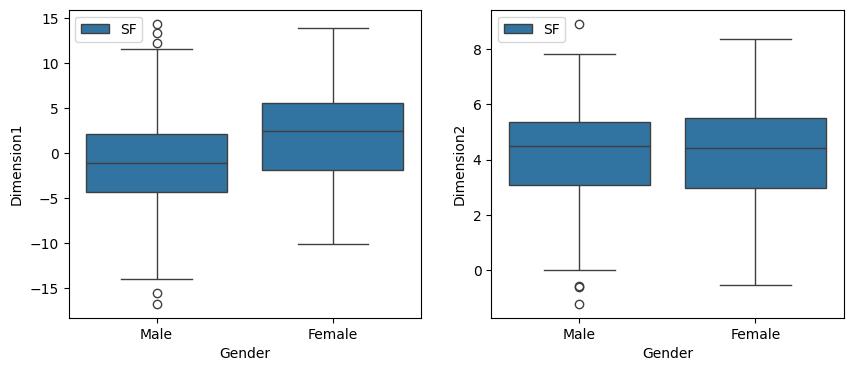

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axs = plt.subplots(ncols=2, figsize=(10, 4))
sns.boxplot(data=df, x="Gender", y="Dimension1", hue=df.Type.tolist(), ax=axs[0])
sns.boxplot(data=df, x="Gender", y="Dimension2", hue=df.Type.tolist(), ax=axs[1])              # SD가 높은 편;mean에서 +-2SD를 제외할 수 있음...outliers(이상치제거 필요)
plt.show()

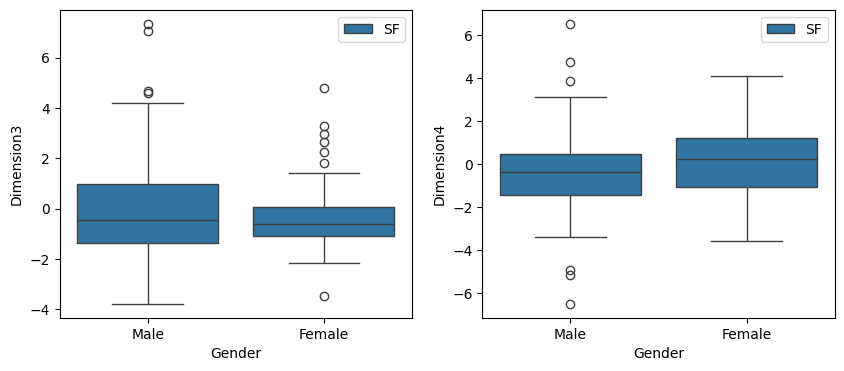

In [50]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 4))
sns.boxplot(data=df, x="Gender", y="Dimension3", hue=df.Type.tolist(), ax=axs[0])
sns.boxplot(data=df, x="Gender", y="Dimension4", hue=df.Type.tolist(), ax=axs[1])           # Female의 Dimension 3의 경우 outliers가 많음; variance 작음
plt.show()

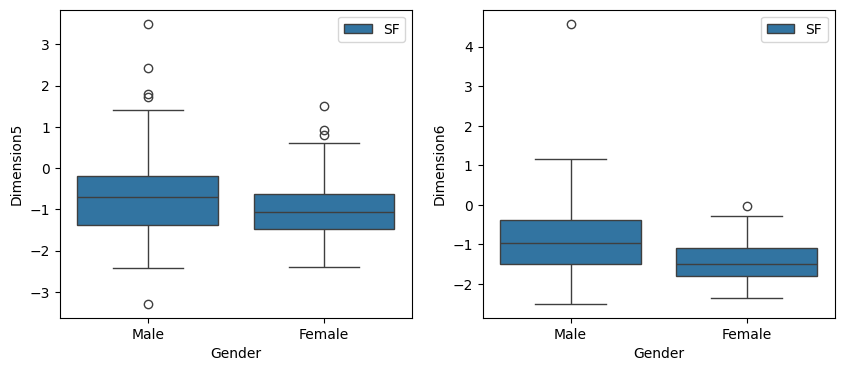

In [51]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 4))
sns.boxplot(data=df, x="Gender", y="Dimension5", hue=df.Type.tolist(), ax=axs[0])
sns.boxplot(data=df, x="Gender", y="Dimension6", hue=df.Type.tolist(), ax=axs[1])
plt.show()